<a href="https://colab.research.google.com/github/Pj-develop/Image_Class_Plant_Disease/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"priyanshujha00","key":"2aaf9e3099c54425bf20c6198920795d"}'}

In [ ]:
!pip install opendatasets
!pip install tensorflow numpy matplotlib seaborn pandas jupyterthemes
!pip install -q kaggle # install kaggle api client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.9 MB/s eta 0:00:00


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [01:18<00:00, 40.0MB/s]
100% 2.70G/2.70G [01:18<00:00, 36.9MB/s]


In [ ]:
!unzip -q new-plant-diseases-dataset.zip

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
train='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

###DATA Preprocessing

In [ ]:
training_set=tf.keras.utils.image_dataset_from_directory(
    train,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)


Found 70295 files belonging to 38 classes.


##Validation_Set

In [ ]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   )


Found 17572 files belonging to 38 classes.


###CNN
We use CNN , it is used for classfication  on text and image
CNN -> convulation -> Pooling -> full connected

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [ ]:
model=Sequential()

#To minimize the overshooting or loss %
1. reduce the learning rate 0.001 to 0.0001 in optimizers
2. There may be chance of underfitting so increase no. of neuuron
3. Add more CNN Layers so more feature map


##Building CNN

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3])) #layer 1
model.add(Conv2D(filters=32,kernel_size=3,activation='relu')) #layer 2 # to boost our trainign speed we are decreasing size of feature matix by removing paddinf
model.add(MaxPool2D(pool_size=2,strides=2)) #layer 3

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')) #layer 1
model.add(Conv2D(filters=64,kernel_size=3,activation='relu')) #layer 2
model.add(MaxPool2D(pool_size=2,strides=2)) #layer 3

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')) #layer 1
model.add(Conv2D(filters=64,kernel_size=3,activation='relu')) #layer 2
model.add(MaxPool2D(pool_size=2,strides=2)) #layer 3

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu')) #layer 1
model.add(Conv2D(filters=128,kernel_size=3,activation='relu')) #layer 2
model.add(MaxPool2D(pool_size=2,strides=2)) #layer 3

#Added Another Layer for extract more features
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu')) #layer 1
model.add(Conv2D(filters=512,kernel_size=3,activation='relu')) #layer 2
model.add(MaxPool2D(pool_size=2,strides=2)) #layer 3

# added Dropout Layer
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(units=1500,activation='relu'))  #Neuron are here , more dense more int

# added Dropout Layer to fix undershooting
model.add(Dropout(0.35))


In [ ]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))  #unit is no. of clasess

##Compiling Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001,),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

###Training Model

In [ ]:
training_histroy=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 159s 72ms/step - loss: 1.3769 - accuracy: 0.5966 - val_loss: 0.5662 - val_accuracy: 0.8188
Epoch 2/10
2197/2197 [==============================] - 166s 75ms/step - loss: 0.4723 - accuracy: 0.8511 - val_loss: 0.3136 - val_accuracy: 0.8978
Epoch 3/10
2197/2197 [==============================] - 161s 73ms/step - loss: 0.2888 - accuracy: 0.9064 - val_loss: 0.2762 - val_accuracy: 0.9099
Epoch 4/10
2197/2197 [==============================] - 151s 69ms/step - loss: 0.2090 - accuracy: 0.9322 - val_loss: 0.1776 - val_accuracy: 0.9413
Epoch 5/10
2197/2197 [==============================] - 143s 65ms/step - loss: 0.1537 - accuracy: 0.9495 - val_loss: 0.2092 - val_accuracy: 0.9353
Epoch 6/10
2197/2197 [==============================] - 141s 64ms/step - loss: 0.1218 - accuracy: 0.9604 - val_loss: 0.1476 - val_accuracy: 0.9539
Epoch 7/10
2197/2197 [==============================] - 143s 65ms/step - loss: 0.0990 - accuracy: 0.9669 - val_loss: 0

In [ ]:
model.save("modelD.keras")

In [ ]:
!kaggle datasets init -p '/content'


Data package template written to: /content/dataset-metadata.json


Based on the kaggle api documentation, you can upload dataset from colab to kaggle with the following steps

Install kaggle in colab !pip install kaggle
Upload your authentication, kaggle.json to /root/.kaggle on colab
Run !kaggle datasets init -p /path/to/dataset to generate a metadata file
Edit the metadata, /path/to/dataset/dataset-metadata.json e.g title and id
Run !kaggle datasets create -p /path/to/dataset
Read the documentation and don't forget -h or --help to view the options when running kaggle cli.

In [ ]:
!kaggle datasets create -p /content/model1

Starting upload for file modelD.keras
100% 73.8M/73.8M [00:05<00:00, 14.1MB/s]
Upload successful: modelD.keras (74MB)
Your private Dataset is being created. Please check progress at https://www.kaggle.com/datasets/priyanshujha00/model1pjdevelop


##Model Evaluation

In [ ]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 63s 27ms/step - loss: 5.0000 - accuracy: 0.0278


In [ ]:
print(train_loss,train_acc)

5.000039577484131 0.027768688276410103


In [ ]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 [==============================] - 15s 28ms/step - loss: 5.0001 - accuracy: 0.0274


In [ ]:
print(val_loss,val_acc)

5.000146389007568 0.02743000164628029


###Saving Our Model

In [ ]:
model.save("trained_model.keras")

In [ ]:
training_histroy.history

{'loss': [1.3769207000732422,
  0.4722664952278137,
  0.2887771427631378,
  0.20903851091861725,
  0.15366418659687042,
  0.12176434695720673,
  0.09901834279298782,
  0.08730120956897736,
  0.07721279561519623,
  0.0642937421798706],
 'accuracy': [0.5965715646743774,
  0.8511273860931396,
  0.9063518047332764,
  0.9321573376655579,
  0.9494558572769165,
  0.9603527784347534,
  0.9669250845909119,
  0.9702396988868713,
  0.9743936061859131,
  0.9784764051437378],
 'val_loss': [0.5662108659744263,
  0.31362494826316833,
  0.276224821805954,
  0.1775691956281662,
  0.2092265486717224,
  0.14756660163402557,
  0.1701180338859558,
  0.1446285992860794,
  0.22331802546977997,
  0.16291561722755432],
 'val_accuracy': [0.8188026547431946,
  0.8978488445281982,
  0.9099134802818298,
  0.9413270950317383,
  0.9352948069572449,
  0.9539039134979248,
  0.9483268857002258,
  0.9573184847831726,
  0.928579568862915,
  0.9533348679542542]}

#Recording History in JSON

In [ ]:
import json
with open('history.json','w') as f:
  json.dump(training_histroy.history,f)

##Accuracy Visusliazation

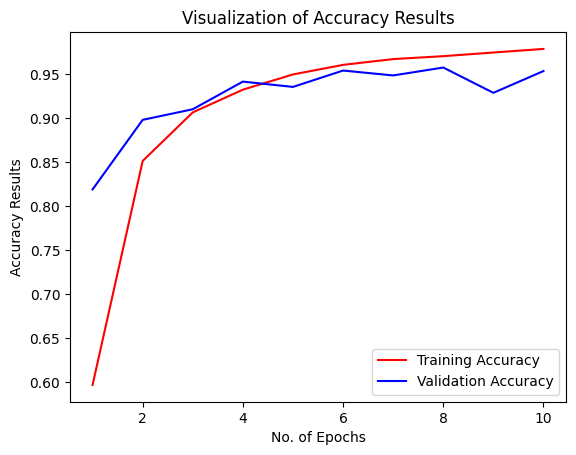

In [ ]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_histroy.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_histroy.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Results')
plt.title('Visualization of Accuracy Results')
plt.legend()
plt.show()

###Some Other Metrics for Model Evaluation

In [ ]:
class_name=validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
test_set=tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)


Found 17572 files belonging to 38 classes.


In [ ]:
y_pred=model.predict(test_set)
print(y_pred,y_pred.shape)

550/550 [==============================] - 18s 32ms/step
[[9.99997854e-01 8.91515981e-08 1.95703204e-10 ... 4.03959939e-17
  3.37294978e-15 4.01765426e-13]
 [9.99898672e-01 4.81958705e-05 4.16002628e-08 ... 8.09252838e-13
  1.58340181e-11 7.68477920e-11]
 [9.99999762e-01 3.80204206e-08 8.48146442e-09 ... 9.00953079e-17
  8.12923540e-14 1.11629993e-11]
 ...
 [2.54331090e-09 1.77755000e-13 1.43193031e-08 ... 3.09332768e-11
  4.18282813e-12 9.99997735e-01]
 [7.17518362e-12 2.55868775e-16 9.92845181e-11 ... 9.11549156e-13
  5.36875720e-13 1.00000000e+00]
 [4.06591486e-20 1.00584234e-22 3.87872062e-18 ... 6.90106833e-20
  3.43363588e-15 1.00000000e+00]] (17572, 38)


In [ ]:
predicted_category=tf.argmax(y_pred,axis=1)
print(predicted_category)

tf.Tensor([ 0  0  0 ... 37 37 37], shape=(17572,), dtype=int64)


In [ ]:
true_category=tf.concat([y for x,y in test_set],axis=0)
# test_set.labels
print(true_category)

tf.Tensor(
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]], shape=(17572, 38), dtype=float32)


In [ ]:
Y_true=tf.argmax(true_category,axis=1)
print(Y_true)

tf.Tensor([ 0  0  0 ... 37 37 37], shape=(17572,), dtype=int64)


###Precision & Recall in ML

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(Y_true,predicted_category,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.88      0.93       504
                                 Apple___Black_rot       0.99      0.96      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.97       440
                                   Apple___healthy       0.86      0.98      0.92       502
                               Blueberry___healthy       0.98      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.99      0.97       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.84      0.97      0.90       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.85      0.

In [ ]:
cm=confusion_matrix(Y_true,predicted_category)
print(cm.shape)

(38, 38)


###Confusion Matrix Visualization

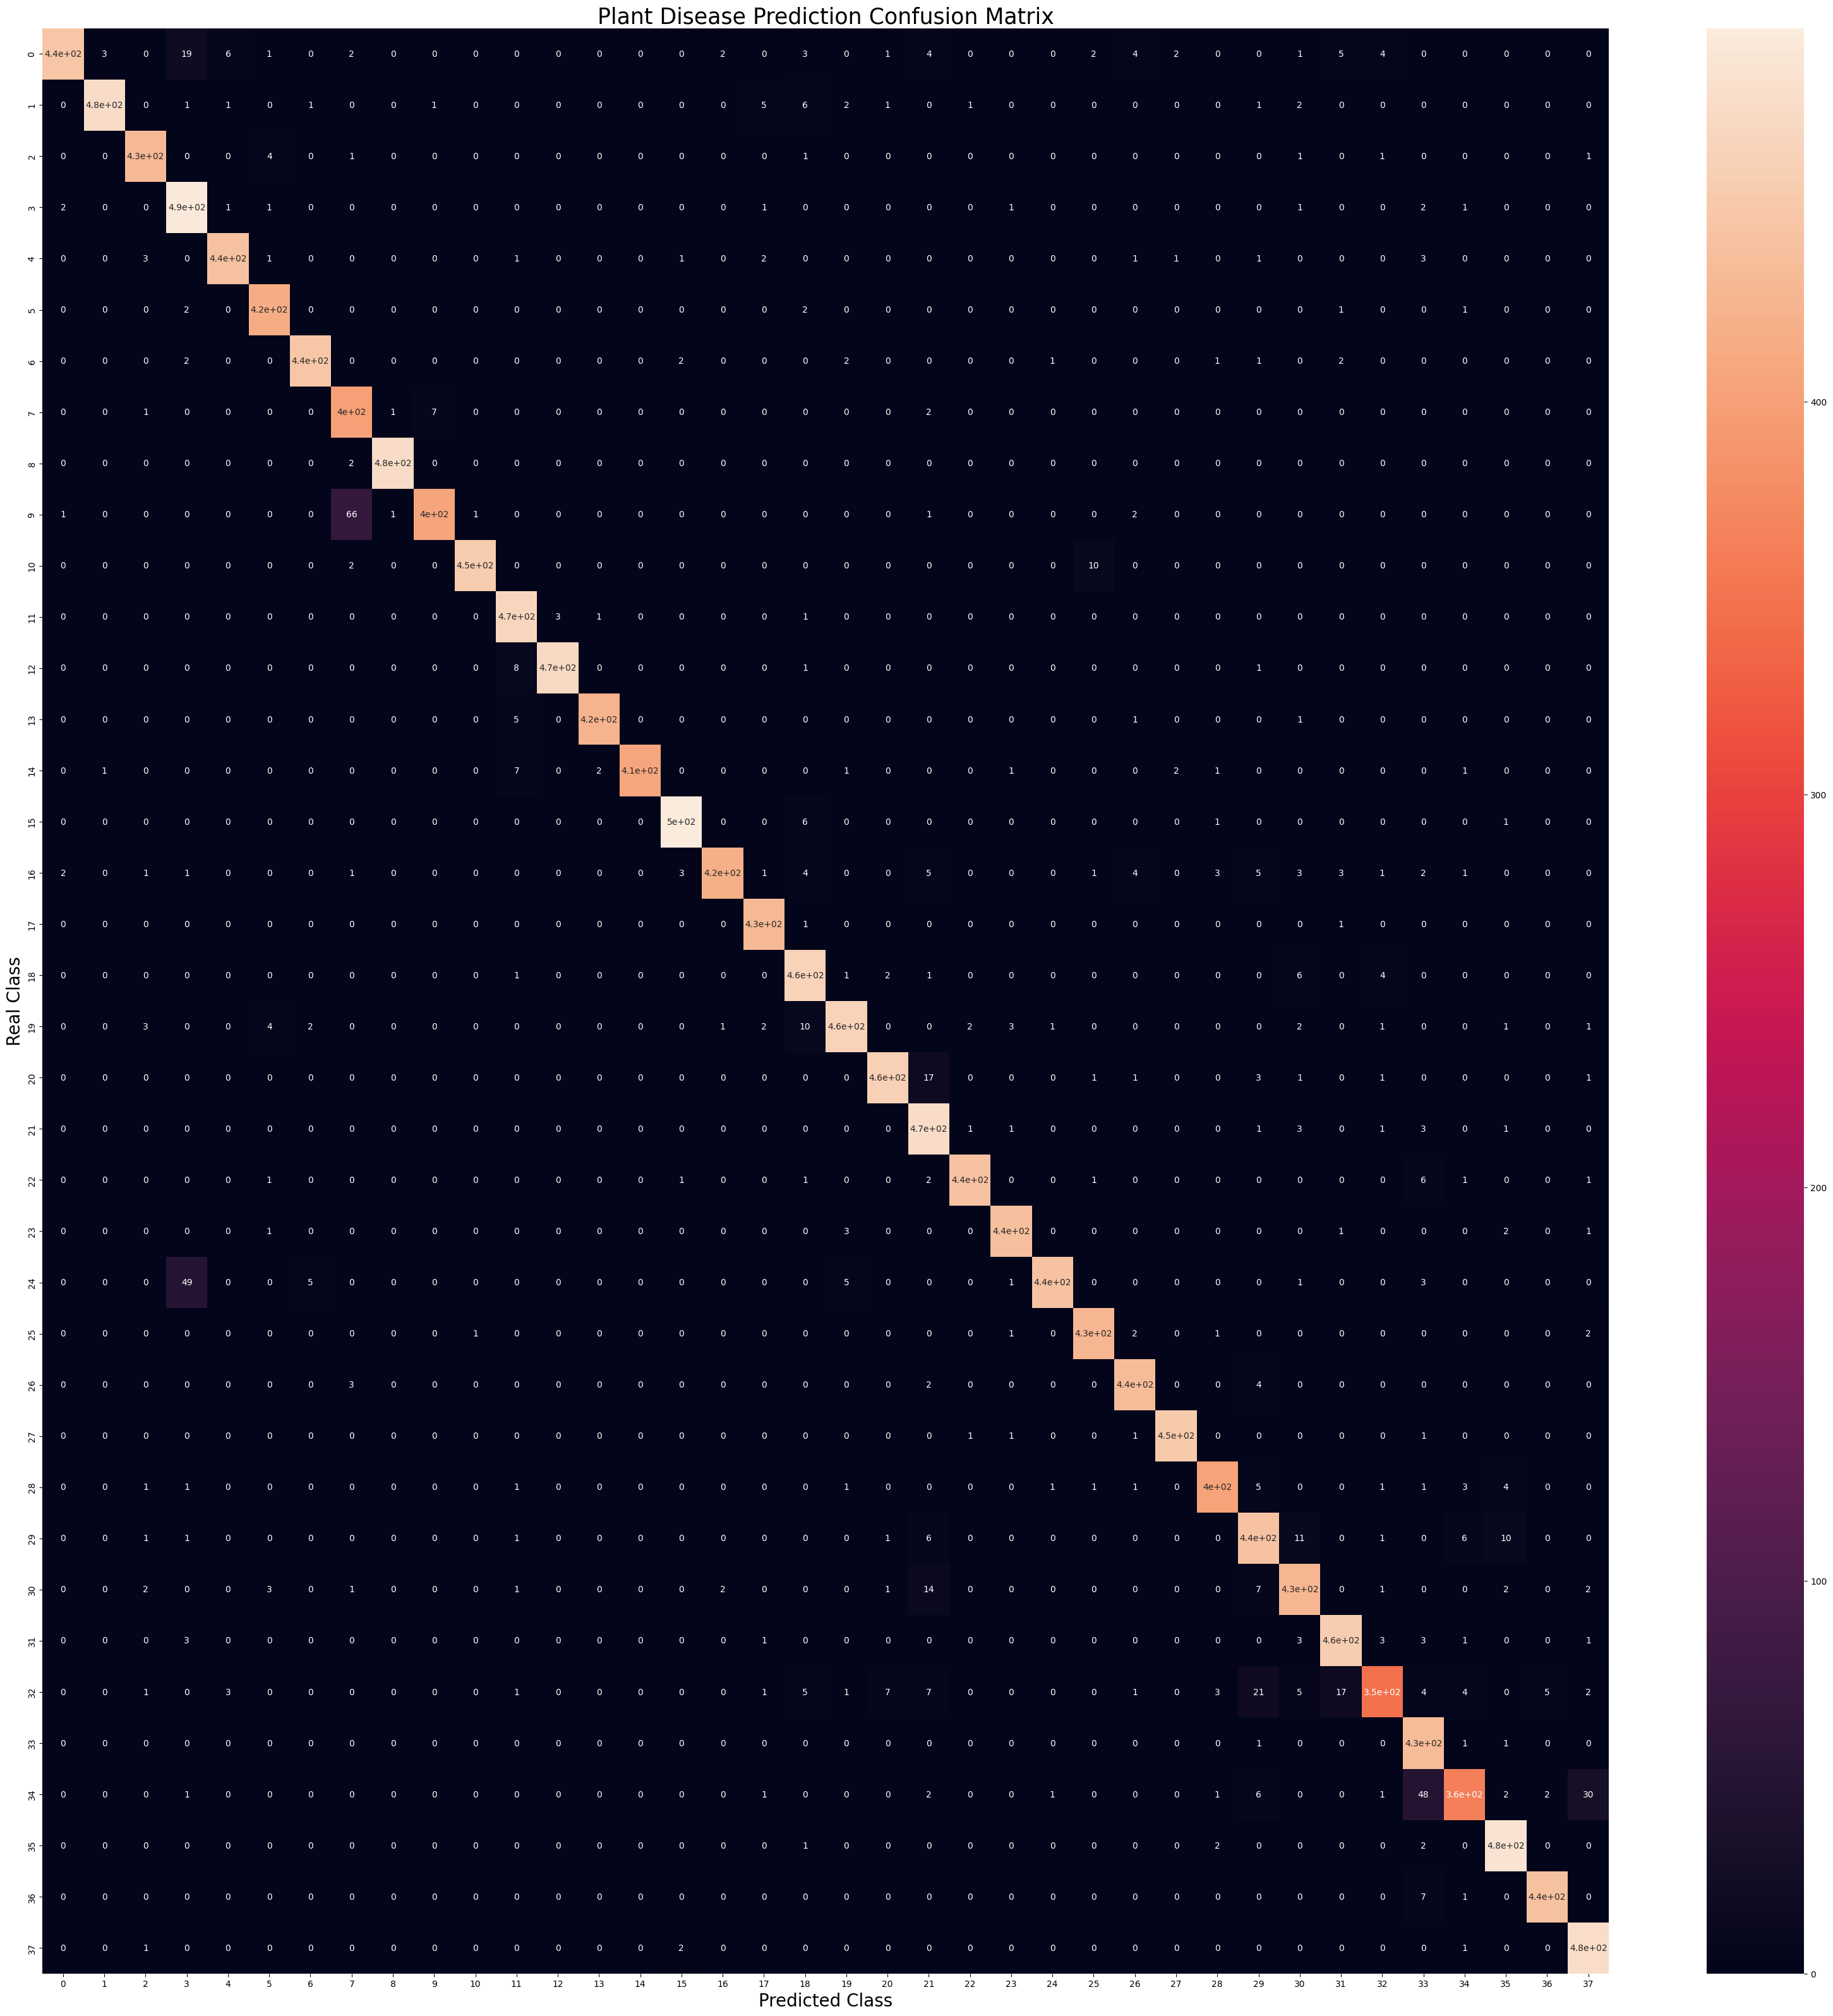

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Real Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()


##Load **Modal**

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
model=tf.keras.models.load_model('trained_model.keras')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

#Visualizing Test Data

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
image_path='/content/test/test/CornCommonRust1.JPG'

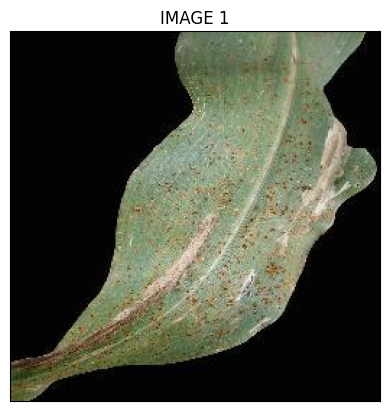

In [ ]:
#read Image
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) ##BGR  TO RGB COLOR

#Displaying Image
plt.imshow(img)
plt.title("IMAGE 1")
plt.xticks([])
plt.yticks([])
plt.show()

##Test Model

In [ ]:
#Test Mode
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


#Prediction

In [ ]:
prediction=model.predict(input_arr)
print(prediction, prediction.shape)

1/1 [==============================] - 0s 20ms/step
[[1.49705236e-18 1.37155231e-18 5.16621959e-19 6.22724476e-22
  1.95217780e-22 3.02978526e-19 8.10459286e-21 5.64308596e-14
  1.00000000e+00 9.50303862e-19 2.51426184e-20 2.01784823e-27
  5.45219612e-22 2.60278801e-26 2.23976456e-28 4.26798173e-23
  2.14419415e-23 1.42207031e-26 2.79339819e-17 2.03189708e-21
  1.03900585e-13 1.86179590e-27 1.59753588e-18 3.19716023e-28
  3.37533584e-24 7.50365571e-19 1.78581832e-21 6.10303718e-26
  1.32359668e-24 4.97524633e-19 1.09672575e-11 1.86166327e-17
  7.17195680e-19 8.08510567e-29 3.05797464e-21 8.92824541e-31
  2.05703251e-29 2.50176971e-18]] (1, 38)


In [ ]:
result=np.argmax(prediction)
print(result)

8


In [ ]:
print(class_name[result])

Corn_(maize)___Common_rust_


##DEPLOY

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


In [ ]:
import streamlit as st
st.write("Hello StreamLit")
st.subheader("Disease Detection Model")
st.selectbox("Which lang u write code",['python','Java','c++'])
st.checkbox("Accepted")
st.slider("Pick Some Value",0,100)

2024-06-23 12:17:24.418 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-06-23 12:17:24.421 Session state does not function when running a script without `streamlit run`


0

In [ ]:
!streamlit run '/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py'




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.32.215.140:8501

  Stopping...
  Stopping...
